In [2]:
import pandas as pd
import numpy as np

# Read the data into pandas DataFrame
singel_df = pd.read_csv("signal-data.csv")
singel_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
df_info = singel_df.info(),
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


(None,)

In [4]:
df_describe = singel_df.describe()
df_describe

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


### Initial Findings:
##### 1. Dataset shape: 1567 rows *  592 columns.
##### 2. Column Types:
* one timestamp column(Time).
* 590 numerical sensor readings (float64).
* One target column (pass/fail with values -1 and 1).
##### 3. Missing values:
* Some columns contain NaN values.
##### 4. target Distribution:
* Pass/Fail is imbalanced (mean = -0.86, meaning more -1 values than 1).


#### 1. Missing Value Treatment:

* Drop the Time column since it's unlikely to help in classification.
* Drop features with too many missing values (threshold: more than 30% missing).
* Impute remaining missing values with the median (robust to outliers).
#### 2.  Attribute Dropping:

* If a column has zero variance (constant values), it doesn't add value and will be removed.
#### 3. Data Cleaning & Processing:

* Ensure the target variable (Pass/Fail) is properly formatted.
* Normalize or standardize features if needed for model training.

In [5]:
# Drop the 'Time' column since it's not useful for classification
df_cleaned = singel_df.drop(columns=['Time'], errors='ignore')
df_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [6]:
# Identify columns with more than 30% missing values
missing_threshold = 0.3 * len(df_cleaned)  # 30% of total rows
cols_to_drop = df_cleaned.columns[df_cleaned.isnull().sum() > missing_threshold]

# Drop those columns
df_cleaned = df_cleaned.drop(columns=cols_to_drop)
df_cleaned.head()
df_cleaned.shape

(1567, 559)

In [7]:
# Fill remaining missing values with the median of each column
df_cleaned = df_cleaned.fillna(df_cleaned.median())

# Drop constant (zero variance) columns
df_cleaned = df_cleaned.loc[:, df_cleaned.nunique() > 1]

# Ensure target variable is properly formatted
df_cleaned['Pass/Fail'] = df_cleaned['Pass/Fail'].astype(int)

# Output the new shape of the dataset after cleaning
df_cleaned.shape

(1567, 443)

In [8]:
Pass = (df_cleaned["Pass/Fail"] == 1).sum()
Fail = (df_cleaned["Pass/Fail"] == -1).sum()
print(Pass)
print(Fail)

104
1463


* Dropped Time column (not useful for classification).
* Removed 149 columns with more than 30% missing values.
* Filled remaining missing values with the median.
* Dropped constant (zero-variance) columns.

####  1.Statistical Summary (mean, median, standard deviation, etc.).
#### 2.Univariate Analysis (distribution of individual features).
#### 3.Bivariate Analysis (correlation between features and target variable).
#### 4.Multivariate Analysis (PCA for feature relationships).

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# statistical summary
stats_summary = df_cleaned.describe().T
stats_summary

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.441551,73.480841,2743.2400,2966.66500,3011.4900,3056.5400,3356.3500
1,1567.0,2495.866110,80.228143,2158.7500,2452.88500,2499.4050,2538.7450,2846.4400
2,1567.0,2200.551958,29.380973,2060.6600,2181.09995,2201.0667,2218.0555,2315.2667
3,1567.0,1395.383474,439.837330,0.0000,1083.88580,1285.2144,1590.1699,3715.0417
4,1567.0,4.171281,56.103721,0.6815,1.01770,1.3168,1.5188,1114.5366
...,...,...,...,...,...,...,...,...
586,1567.0,0.021458,0.012354,-0.0169,0.01345,0.0205,0.0276,0.1028
587,1567.0,0.016474,0.008805,0.0032,0.01060,0.0148,0.0203,0.0799
588,1567.0,0.005283,0.002866,0.0010,0.00330,0.0046,0.0064,0.0286
589,1567.0,99.652345,93.864558,0.0000,44.36860,71.9005,114.7497,737.3048


C:\Users\HP\AppData\Local\Temp\ipykernel_17948\2784829168.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned['Pass/Fail'], palette="viridis")


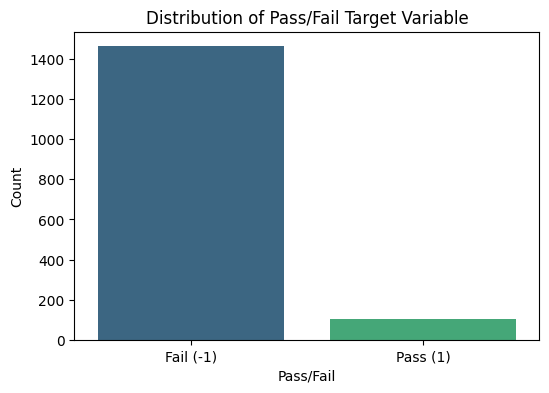

In [10]:
import seaborn as sns

# 2. Univariate Analysis (Distribution of Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(x=df_cleaned['Pass/Fail'], palette="viridis")
plt.title("Distribution of Pass/Fail Target Variable")
plt.xlabel("Pass/Fail")
plt.ylabel("Count")
plt.xticks(ticks=[1,0], labels=["Pass (1)", "Fail (-1)"])
plt.show()


In [11]:
# 3. Bivariate Analysis (Correlation Heatmap)
correlation_matrix = df_cleaned.corr()
correlation_matrix

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.144161,0.004667,-0.006665,-0.010819,0.002028,0.031347,-0.052735,0.009091,0.006445,...,0.008639,0.000190,0.023562,0.019994,0.023695,0.018534,-0.025867,-0.028161,0.004185,-0.025100
1,-0.144161,1.000000,0.005883,-0.008963,-0.001917,-0.025222,-0.011761,0.031244,0.024025,0.009529,...,-0.010156,0.043754,0.002863,-0.001305,0.002231,-0.009430,0.017056,0.009868,0.044552,-0.002542
2,0.004667,0.005883,1.000000,0.298810,0.095881,-0.136212,-0.147116,0.023524,0.016248,0.069902,...,-0.028737,-0.005971,0.015694,0.018224,0.015749,-0.025506,-0.029287,-0.030743,-0.032763,-0.000999
3,-0.006665,-0.008963,0.298810,1.000000,-0.058351,-0.685773,0.086965,-0.102839,0.066987,0.049785,...,0.016888,0.008305,0.025288,0.024615,0.025882,0.035164,-0.039196,-0.033755,-0.080942,-0.024014
4,-0.010819,-0.001917,0.095881,-0.058351,1.000000,-0.074395,-0.343413,-0.025933,0.053973,-0.006496,...,-0.003978,0.044943,-0.001331,-0.001621,-0.001645,-0.043831,-0.031012,-0.026115,0.050792,-0.013633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018534,-0.009430,-0.025506,0.035164,-0.043831,-0.041299,0.058019,0.010418,0.033700,0.000329,...,-0.002678,-0.016729,0.002258,0.001603,0.002745,1.000000,0.167920,0.164247,-0.486530,0.004170
587,-0.025867,0.017056,-0.029287,-0.039196,-0.031012,0.034113,-0.021518,0.022793,0.059181,0.046995,...,-0.009388,-0.024507,-0.002566,-0.002442,-0.002848,0.167920,1.000000,0.974276,0.390834,0.035423
588,-0.028161,0.009868,-0.030743,-0.033755,-0.026115,0.032341,-0.020936,0.026185,0.060609,0.046083,...,-0.015575,-0.020743,-0.002172,-0.001900,-0.002444,0.164247,0.974276,1.000000,0.389238,0.031207
589,0.004185,0.044552,-0.032763,-0.080942,0.050792,0.044039,-0.107904,-0.022864,0.004670,0.008462,...,-0.024740,0.041449,-0.002928,-0.003246,-0.003722,-0.486530,0.390834,0.389238,1.000000,-0.002603


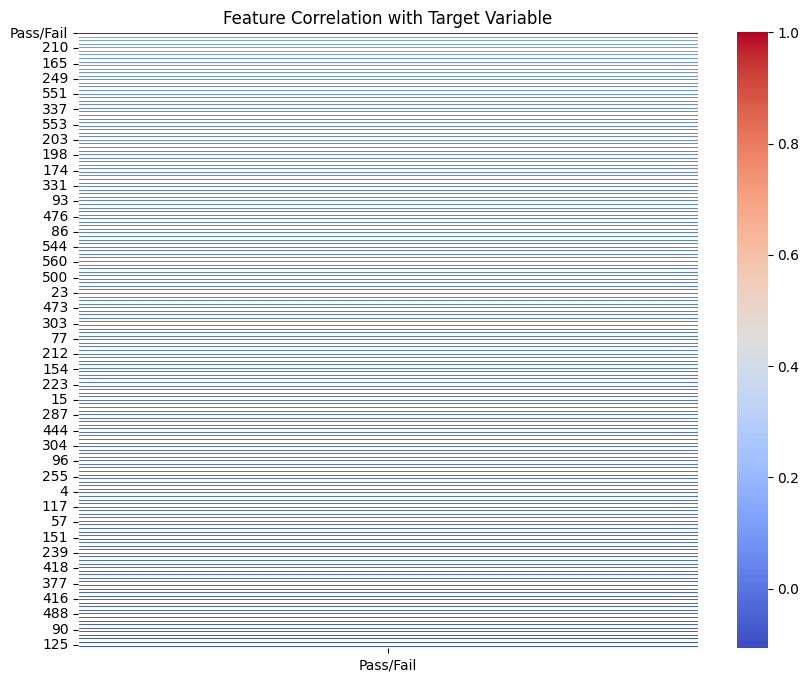

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix.iloc[-1:].T.sort_values(by="Pass/Fail", ascending=False),
            cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation with Target Variable")
plt.show()

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### 4. Multivariate Analysis (PCA for Feature Relationships)

# Standardize data
features = df_cleaned.drop(columns=['Pass/Fail'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Pass/Fail'] = df_cleaned['Pass/Fail']
pca_df

,PCA1,PCA2,Pass/Fail
0,-1.752245,2.859632,-1
1,-2.276844,0.728518,-1
2,0.137968,0.625396,1
3,1.114541,5.165146,-1
4,0.808255,2.456714,-1
...,...,...,...
1562,-1.090029,-3.641320,-1
1563,-0.378197,0.649672,-1
1564,-1.133527,-1.649412,-1
1565,-1.099278,-3.133081,-1


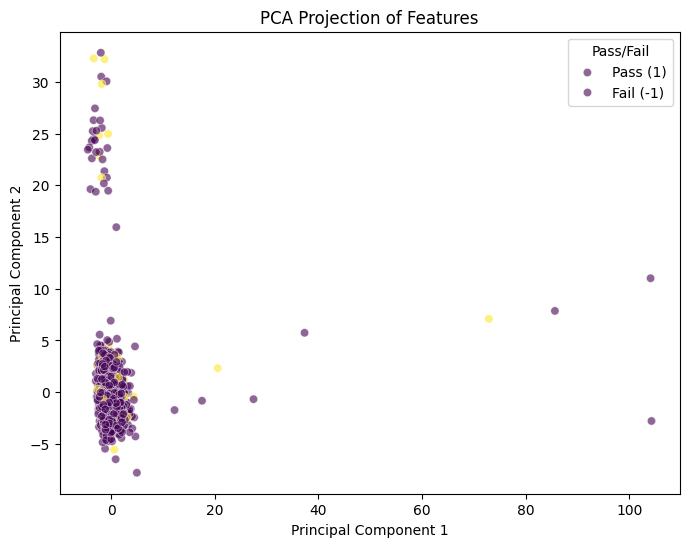

In [14]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Pass/Fail', data=pca_df, palette="viridis", alpha=0.6)
plt.title("PCA Projection of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Pass/Fail", labels=["Pass (1)", "Fail (-1)"])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Segregate Predictors and Target 
X = df_cleaned.drop(columns=['Pass/Fail'])
y = df_cleaned['Pass/Fail']

# Check and Fix Target Imbalance 
print("Class Distribution Before SMOTE:")
print(y.value_counts())

Class Distribution Before SMOTE:
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


In [16]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass Distribution After SMOTE:")
print(y_resampled.value_counts())


Class Distribution After SMOTE:
Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64


In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_train_scaled


(array([[-0.79230064, -0.2911184 ,  1.93487031, ..., -1.45943189,
         -1.46422845, -0.65526789],
        [ 0.81555487,  0.62748797, -0.91190403, ...,  0.46136364,
          1.27207824, -0.26271827],
        [-1.65234592,  1.11794831, -1.50822717, ...,  0.2353877 ,
          0.21664566, -0.30432285],
        ...,
        [ 0.09470929, -0.77211148,  0.90924098, ..., -0.75639562,
         -0.68242654, -0.27675093],
        [ 0.06477994, -0.40076899,  0.65767818, ...,  0.02196597,
         -0.01789491,  0.97674188],
        [ 0.61056705,  1.15553473,  0.26383604, ..., -0.27933529,
         -0.01789491, -0.22569654]], shape=(2340, 442)),
 array([[-0.79230064, -0.2911184 ,  1.93487031, ..., -1.45943189,
         -1.46422845, -0.65526789],
        [ 0.81555487,  0.62748797, -0.91190403, ...,  0.46136364,
          1.27207824, -0.26271827],
        [-1.65234592,  1.11794831, -1.50822717, ...,  0.2353877 ,
          0.21664566, -0.30432285],
        ...,
        [ 0.09470929, -0.77211148, 

In [18]:
# Compare Train/Test Stats
train_stats = pd.DataFrame(X_train)
test_stats = pd.DataFrame(X_test)

train_stats

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
752,2951.590000,2474.600000,2251.822200,1104.913200,1.388100,104.945600,0.120600,1.562900,-0.026100,-0.003400,...,1.045100,14.110500,0.507000,0.013500,0.003500,2.659200,0.011900,0.005400,0.001700,45.700400
1165,3065.480000,2539.610000,2175.122200,1004.502900,1.296400,105.968900,0.124900,1.511000,0.001100,-0.001600,...,1.582800,9.363000,0.502000,0.009500,0.002400,1.894200,0.026900,0.020700,0.008700,77.204700
590,2890.670000,2574.320000,2159.055600,1084.377900,0.818400,100.705600,0.124900,1.515700,-0.015800,0.000800,...,2.060100,10.129200,0.509800,0.017300,0.003800,3.383900,0.025600,0.018900,0.006000,73.865700
797,2896.840000,2512.610000,2190.155500,1298.820700,1.394700,105.741100,0.124200,1.422800,-0.001100,-0.000200,...,1.768100,23.348800,0.502200,0.034600,0.007300,6.885500,0.040600,0.026800,0.009100,66.168700
624,2989.440000,2487.660000,2201.066700,880.231700,1.414800,106.547800,0.121100,1.530100,-0.002300,0.002000,...,0.984200,16.423100,0.493300,0.012600,0.003200,2.557900,0.022700,0.014900,0.005200,65.483100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,2999.667969,2458.977182,2211.169111,1301.852793,1.236522,107.100234,0.121629,1.475063,-0.018273,0.015289,...,1.653766,13.146040,0.499439,0.013730,0.003764,2.759489,0.027219,0.025872,0.008499,106.953592
2365,2918.122865,2525.344252,2191.631692,1352.780594,1.809393,100.459242,0.123610,1.529512,-0.001976,0.000691,...,1.563923,13.752599,0.505198,0.016157,0.003808,3.203753,0.016615,0.013845,0.003913,84.723804
1304,3014.420000,2440.560000,2224.188900,997.795300,1112.160000,86.164400,0.122400,1.434700,0.000600,0.008400,...,1.059700,13.180700,0.501900,0.018900,0.004500,3.762600,0.014400,0.011000,0.003700,76.078500
1558,3012.300000,2466.840000,2217.411100,1032.283600,1.480200,101.351100,0.119500,1.383200,0.004200,0.002300,...,1.721300,23.405400,0.499300,0.013000,0.003700,2.597600,0.009700,0.017200,0.005400,176.678300


In [19]:
test_stats

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
2493,3002.400828,2703.388140,2173.606679,1770.853585,1.371414,100.090490,0.127363,1.429140,-0.008069,0.007039,...,2.105292,23.065677,0.498911,0.012073,0.002740,2.415008,0.005483,0.016648,0.005896,275.581195
2847,3034.556582,2339.556443,2277.380151,2013.973746,1.014841,94.655316,0.118173,1.536776,0.021790,0.009191,...,1.781533,17.339781,0.504256,0.014464,0.003496,2.875001,0.013028,0.005936,0.002095,48.440396
459,2996.660000,2501.030000,2235.055600,1302.660700,1.634700,109.985600,0.123000,1.545800,-0.010700,-0.004800,...,1.684000,12.867900,0.505600,0.013700,0.004000,2.713700,0.023200,0.007100,0.002300,30.458700
1360,3024.480000,2538.130000,2207.955500,1283.436800,1.846700,95.402200,0.121600,1.428800,-0.006300,0.001200,...,1.488300,17.411700,0.502200,0.011200,0.002900,2.228700,0.007700,0.014900,0.004100,193.463300
2744,2923.421947,2509.846945,2174.763115,1056.629362,1.187657,101.579294,0.124916,1.472026,-0.001070,0.002455,...,1.371925,13.991951,0.498803,0.013212,0.003784,2.642904,0.023254,0.011785,0.004146,64.710729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2933.790000,2417.700000,2195.533300,1561.716400,1.429200,99.250000,0.122300,1.496500,-0.004500,-0.000600,...,1.779600,20.573300,0.504400,0.019200,0.004800,3.807100,0.018700,0.010800,0.003300,58.082700
1486,2984.930000,2432.380000,2177.433300,2945.885500,1.332100,83.170000,0.125300,1.347100,-0.008900,0.013500,...,1.571300,18.122200,0.499400,0.011800,0.003500,2.361200,0.019100,0.012300,0.004000,64.678900
871,3212.460000,2522.410000,2200.233300,1173.837700,1.328100,101.611100,0.121100,1.465000,0.003500,0.005300,...,1.763700,9.339800,0.493600,0.013100,0.003200,2.645700,0.011700,0.026200,0.008900,223.101800
2808,3041.679415,2617.060663,2180.259772,1191.498437,1.287911,103.180179,0.123672,1.465427,-0.010688,0.003639,...,1.616633,15.609753,0.502030,0.023694,0.005099,4.732457,0.027783,0.045703,0.012225,159.915162


In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score


# Feature Selection 
# Use SelectKBest with ANOVA F-test to select top 100 features
k_best = SelectKBest(score_func=f_classif, k=100)
train = k_best.fit_transform(train_stats, y_train)
test = k_best.transform(test_stats)

train


array([[2.95159e+03, 9.47700e-01, 9.54370e+00, ..., 8.99000e-02,
        1.41105e+01, 5.40000e-03],
       [3.06548e+03, 9.63500e-01, 1.26469e+01, ..., 5.72000e-02,
        9.36300e+00, 2.07000e-02],
       [2.89067e+03, 9.53100e-01, 1.02639e+01, ..., 8.33000e-02,
        1.01292e+01, 1.89000e-02],
       ...,
       [3.01442e+03, 9.62500e-01, 7.28460e+00, ..., 3.96000e-02,
        1.31807e+01, 1.10000e-02],
       [3.01230e+03, 9.70000e-01, 8.60790e+00, ..., 1.46300e-01,
        2.34054e+01, 1.72000e-02],
       [3.05096e+03, 9.64100e-01, 1.23758e+01, ..., 8.59000e-02,
        1.28307e+01, 1.48000e-02]], shape=(2340, 100))

In [24]:
test

array([[3.00240083e+03, 9.56268893e-01, 5.79723956e+00, ...,
        1.86564061e-01, 2.30656769e+01, 1.66477084e-02],
       [3.03455658e+03, 9.68323507e-01, 7.89837271e+00, ...,
        1.28601412e-01, 1.73397811e+01, 5.93577229e-03],
       [2.99666000e+03, 9.57700000e-01, 1.03240000e+01, ...,
        1.12200000e-01, 1.28679000e+01, 7.10000000e-03],
       ...,
       [3.21246000e+03, 9.77000000e-01, 1.07101000e+01, ...,
        6.07000000e-02, 9.33980000e+00, 2.62000000e-02],
       [3.04167941e+03, 9.70030703e-01, 1.17134794e+01, ...,
        1.08307424e-01, 1.56097531e+01, 4.57027611e-02],
       [2.92771000e+03, 9.76100000e-01, 5.26950000e+00, ...,
        9.36000000e-02, 1.37332000e+01, 1.48000000e-02]], shape=(586, 100))

In [25]:
# Model Training and Evaluation
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Hyperparameter grids
param_grids = {
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Naive Bayes": {}  # No hyperparameters to tune for GaussianNB
}

best_models = {}
classification_reports = {}
accuracies = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(train, y_train)
    
    # Save best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Evaluate performance
    y_train_pred = grid_search.best_estimator_.predict(train)
    y_test_pred = grid_search.best_estimator_.predict(test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    accuracies[model_name] = {"Train Accuracy": train_acc, "Test Accuracy": test_acc}
    classification_reports[model_name] = classification_report(y_test, y_test_pred)

# Select the best model based on test accuracy
best_model_name = max(accuracies, key=lambda x: accuracies[x]["Test Accuracy"])
best_model = best_models[best_model_name]

best_model


RandomForestClassifier(n_estimators=200, random_state=42)

In [27]:
import joblib
# Save the best model
joblib.dump(best_model, 'model.pkl')

print("Model save successfully")

Model save successfully


In [28]:
# Load the saved model
loaded_model = joblib.load('model.pkl')

# Make predictions
predictions = loaded_model.predict(df_cleaned[:100])

print("Model loaded and predictions made successfully!")
print(predictions)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 443 features, but RandomForestClassifier is expecting 100 features as input.